<a href="https://colab.research.google.com/github/Hristo2076/ml_processes/blob/main/omissions.ipynb" target="_parent"><img src="https://colab.research.google.com/assets/colab-badge.svg" alt="Open In Colab"/></a>

#**Цель:** 
**применить на практике методы по оценке качества данных.**

In [ ]:
#import
import pandas as pd
import numpy as np
import matplotlib.pyplot as plt
import seaborn as sns

#model
from sklearn.model_selection import train_test_split
from sklearn.preprocessing import LabelEncoder
from sklearn.pipeline import Pipeline
from sklearn.preprocessing import StandardScaler
from sklearn.linear_model import LogisticRegression

#metrics
from sklearn.metrics import roc_auc_score
from sklearn.metrics import roc_curve

#validate
from sklearn.model_selection import cross_val_score
from sklearn.model_selection import KFold
from sklearn.model_selection import StratifiedKFold

1. Получите и загрузите данные.
2. Удалите все пропущенные значения и категориальные переменные. Обучите модель. Выберете и посчитайте метрику качества.

In [ ]:
train = pd.read_csv('train.csv',index_col=0)
train.head()

,Survived,Pclass,Name,Sex,Age,SibSp,Parch,Ticket,Fare,Cabin,Embarked
PassengerId,,,,,,,,,,,
1,0,3,"Braund, Mr. Owen Harris",male,22.0,1,0,A/5 21171,7.2500,NaN,S
2,1,1,"Cumings, Mrs. John Bradley (Florence Briggs Th...",female,38.0,1,0,PC 17599,71.2833,C85,C
3,1,3,"Heikkinen, Miss. Laina",female,26.0,0,0,STON/O2. 3101282,7.9250,NaN,S
4,1,1,"Futrelle, Mrs. Jacques Heath (Lily May Peel)",female,35.0,1,0,113803,53.1000,C123,S
5,0,3,"Allen, Mr. William Henry",male,35.0,0,0,373450,8.0500,NaN,S


In [ ]:
train.Age = train.Age.fillna(train.Age.mean())

In [ ]:
train.info()

<class 'pandas.core.frame.DataFrame'>
Int64Index: 891 entries, 1 to 891
Data columns (total 11 columns):
 #   Column    Non-Null Count  Dtype  
---  ------    --------------  -----  
 0   Survived  891 non-null    int64  
 1   Pclass    891 non-null    int64  
 2   Name      891 non-null    object 
 3   Sex       891 non-null    object 
 4   Age       891 non-null    float64
 5   SibSp     891 non-null    int64  
 6   Parch     891 non-null    int64  
 7   Ticket    891 non-null    object 
 8   Fare      891 non-null    float64
 9   Cabin     204 non-null    object 
 10  Embarked  889 non-null    object 
dtypes: float64(2), int64(4), object(5)
memory usage: 83.5+ KB


In [ ]:
train = train[['Age','Fare','Survived']]
train[:5]

,Age,Fare,Survived
PassengerId,,,
1,22.0,7.2500,0
2,38.0,71.2833,1
3,26.0,7.9250,1
4,35.0,53.1000,1
5,35.0,8.0500,0


In [ ]:
X = train.drop('Survived',axis=1)
y = train['Survived']

In [ ]:
X_train,X_test,y_train,y_test = train_test_split(X,y,
                                                 random_state=42,
                                                 test_size=0.2)

In [ ]:
LR = LogisticRegression()
LR.fit(X_train,y_train)

LogisticRegression()

In [ ]:
y_pred = LR.predict(X_test)
y_pred

array([0, 0, 0, 0, 0, 1, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0,
       0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 1, 0, 0, 0,
       0, 0, 0, 0, 0, 1, 0, 1, 0, 1, 0, 1, 0, 1, 0, 0, 0, 0, 0, 0, 0, 0,
       1, 0, 0, 0, 0, 1, 0, 1, 0, 0, 0, 0, 0, 0, 0, 0, 1, 0, 0, 0, 1, 0,
       0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 1, 0, 0, 0, 0, 0, 0, 0,
       0, 0, 1, 0, 1, 0, 0, 0, 0, 0, 0, 1, 0, 0, 0, 0, 0, 1, 0, 0, 0, 0,
       0, 0, 0, 0, 1, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 1, 0, 0, 0, 0, 0,
       0, 0, 0, 0, 0, 0, 0, 0, 0, 1, 0, 0, 0, 0, 0, 0, 1, 0, 0, 0, 0, 0,
       0, 0, 0])

In [ ]:
predictions = LR.predict_proba(X_test)

In [ ]:
LR.score(X_test,y_test)

0.6480446927374302

In [ ]:
roc_auc_score(y_test,predictions[:,1])

0.7892535392535392

In [ ]:
fpr,tpr,tres = roc_curve(y_test,predictions[:,1])


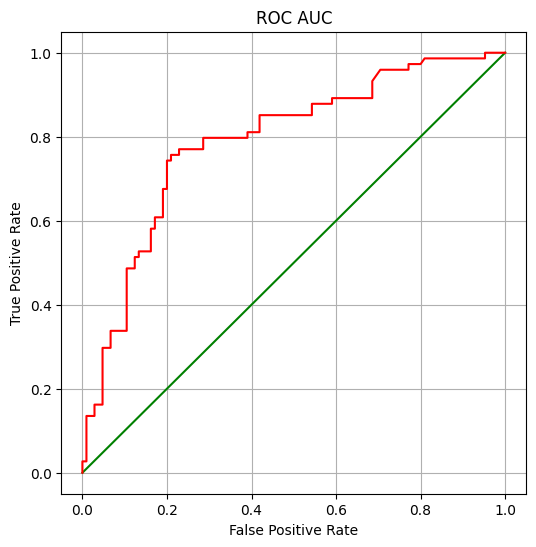

In [ ]:
plt.figure(figsize=(6,6))
a = [0,1]
b = [0,1]
plt.plot(a,b,color='g')
plt.plot(fpr, tpr,color='r')
plt.title('ROC AUC')
plt.xlabel('False Positive Rate')
plt.ylabel('True Positive Rate')
plt.grid()
plt.show()

####**Вывод**:
Несотря на ужасное качество модели, процент осознанности выбора довольно высокий 

3. Снова загрузите полные данные.
4. Удалите признаки, которые логически не нужны для построения модели. Обоснуйте.
5. Проверьте данные на наличие пропущенных значений.
  1. Посчитайте, какой процент данных будет потерян, если просто удалить пропуски.
  2. Заполните пропуски: средним значением; константой; классом, указывающим на то, что значение было пропущено; случайным числом. Для разных признаков используйте подходящий метод. Можно не использовать все перечисленные методы.

In [ ]:
train_1 = pd.read_csv('train.csv',index_col=0)
train_1.head()

,Survived,Pclass,Name,Sex,Age,SibSp,Parch,Ticket,Fare,Cabin,Embarked
PassengerId,,,,,,,,,,,
1,0,3,"Braund, Mr. Owen Harris",male,22.0,1,0,A/5 21171,7.2500,NaN,S
2,1,1,"Cumings, Mrs. John Bradley (Florence Briggs Th...",female,38.0,1,0,PC 17599,71.2833,C85,C
3,1,3,"Heikkinen, Miss. Laina",female,26.0,0,0,STON/O2. 3101282,7.9250,NaN,S
4,1,1,"Futrelle, Mrs. Jacques Heath (Lily May Peel)",female,35.0,1,0,113803,53.1000,C123,S
5,0,3,"Allen, Mr. William Henry",male,35.0,0,0,373450,8.0500,NaN,S


In [ ]:
train_1.info()

<class 'pandas.core.frame.DataFrame'>
Int64Index: 891 entries, 1 to 891
Data columns (total 11 columns):
 #   Column    Non-Null Count  Dtype  
---  ------    --------------  -----  
 0   Survived  891 non-null    int64  
 1   Pclass    891 non-null    int64  
 2   Name      891 non-null    object 
 3   Sex       891 non-null    object 
 4   Age       714 non-null    float64
 5   SibSp     891 non-null    int64  
 6   Parch     891 non-null    int64  
 7   Ticket    891 non-null    object 
 8   Fare      891 non-null    float64
 9   Cabin     204 non-null    object 
 10  Embarked  889 non-null    object 
dtypes: float64(2), int64(4), object(5)
memory usage: 83.5+ KB


In [ ]:
#Можно удалить следующие столбцы ['Name','ticket','Cabin'], эти столбцы не несут никакой смысловой нагрузки,
# модель не будет ориентироваться на имена,
#колонка с билетами имеет слишком хфотичный набор цифр и букв
#колонка с номером кабины имеет более 75% пропусков

train_1 = train_1.drop(['Name','Ticket','Cabin'],axis=1)
train_1

,Survived,Pclass,Sex,Age,SibSp,Parch,Fare,Embarked
PassengerId,,,,,,,,
1,0,3,male,22.0,1,0,7.2500,S
2,1,1,female,38.0,1,0,71.2833,C
3,1,3,female,26.0,0,0,7.9250,S
4,1,1,female,35.0,1,0,53.1000,S
5,0,3,male,35.0,0,0,8.0500,S
...,...,...,...,...,...,...,...,...
887,0,2,male,27.0,0,0,13.0000,S
888,1,1,female,19.0,0,0,30.0000,S
889,0,3,female,NaN,1,2,23.4500,S


In [ ]:
train_1.isna().sum()

Survived      0
Pclass        0
Sex           0
Age         177
SibSp         0
Parch         0
Fare          0
Embarked      2
dtype: int64

In [ ]:
train_del = train_1.dropna(subset=['Age','Embarked'])
train_del.head()

,Survived,Pclass,Sex,Age,SibSp,Parch,Fare,Embarked
PassengerId,,,,,,,,
1,0,3,male,22.0,1,0,7.2500,S
2,1,1,female,38.0,1,0,71.2833,C
3,1,3,female,26.0,0,0,7.9250,S
4,1,1,female,35.0,1,0,53.1000,S
5,0,3,male,35.0,0,0,8.0500,S


In [ ]:
train_1.isna().sum()

Survived      0
Pclass        0
Sex           0
Age         177
SibSp         0
Parch         0
Fare          0
Embarked      2
dtype: int64

In [ ]:
train_1.shape[0] ,train_del.shape[0] 

(891, 712)

In [ ]:
percent = (1 - train_del.shape[0] / train_1.shape[0]) *100
print(f'percentage of losses: {round(percent,2)}')

percentage of losses: 20.09


In [ ]:
train_1.Age.median(),\
train_1.Embarked.mode()[0]

(28.0, 'S')

In [ ]:
#Предлагаю заполнить возраст медианой, а порт посадки модой 

train_1.Embarked.fillna(train_1.Embarked.mode()[0],inplace=True)
train_1.Age.fillna(train_1.groupby(['Sex','Embarked'])['Age'].transform('median'),inplace=True)

In [ ]:
train_1.isna().sum()

Survived    0
Pclass      0
Sex         0
Age         0
SibSp       0
Parch       0
Fare        0
Embarked    0
dtype: int64

6. Категориальные переменные переведите в цифровые значения. Можно использовать pd.get_dummies, preprocessing.LabelEncoder. Старайтесь не использовать для этой задачи циклы.

In [ ]:
train_1[:5]

,Survived,Pclass,Sex,Age,SibSp,Parch,Fare,Embarked
PassengerId,,,,,,,,
1,0,3,male,22.0,1,0,7.2500,S
2,1,1,female,38.0,1,0,71.2833,C
3,1,3,female,26.0,0,0,7.9250,S
4,1,1,female,35.0,1,0,53.1000,S
5,0,3,male,35.0,0,0,8.0500,S


In [ ]:
train_1.Pclass = train_1.Pclass.astype(str)

In [ ]:
le = LabelEncoder()
train_1.Sex = le.fit_transform(train_1.Sex)

ohe =  pd.get_dummies(train_1.Embarked,drop_first=True,dtype=int)
train_1 = pd.concat([train_1,ohe],axis=1)

ohe_1 =  pd.get_dummies(train_1.Pclass,drop_first=True,dtype=int,)
train_1 = pd.concat([train_1,ohe_1],axis=1)

train_1 = train_1.drop(['Parch','Embarked'],axis=1)

In [ ]:
train_1[:5]

,Survived,Pclass,Sex,Age,SibSp,Fare,Q,S,2,3
PassengerId,,,,,,,,,,
1,0,3,1,22.0,1,7.2500,0,1,0,1
2,1,1,0,38.0,1,71.2833,0,0,0,0
3,1,3,0,26.0,0,7.9250,0,1,0,1
4,1,1,0,35.0,1,53.1000,0,1,0,0
5,0,3,1,35.0,0,8.0500,0,1,0,1


7. Проверьте данные на наличие выбросов.
  1. Удалите выбросы, если считаете это целесообразным. Обоснуйте.
8. *Постройте 1-2 графика на выбор. Визуализация должна быть основана на исследуемых данных и быть полезной (из графика можно сделать вывод об особенностях датасета/класса/признака)
9. *Попробуйте математически преобразовать признак Age.

{'whiskers': [<matplotlib.lines.Line2D at 0x7fb0704a5180>,
 'caps': [<matplotlib.lines.Line2D at 0x7fb0704a56c0>,
 'boxes': [<matplotlib.lines.Line2D at 0x7fb0704a4ee0>],
 'medians': [<matplotlib.lines.Line2D at 0x7fb0704a5c00>],
 'fliers': [<matplotlib.lines.Line2D at 0x7fb0704a5ea0>],
 'means': []}

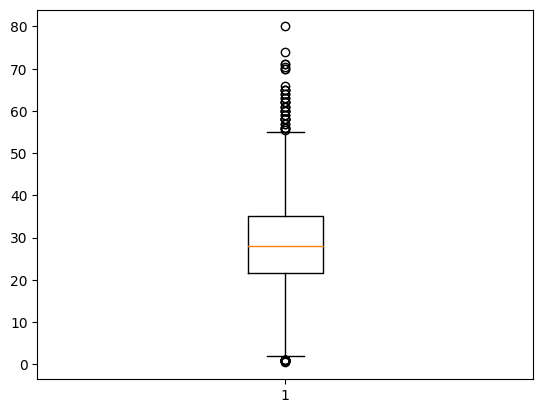

In [ ]:
plt.boxplot(train_1.Age)

{'whiskers': [<matplotlib.lines.Line2D at 0x7fb0705e5660>,
 'caps': [<matplotlib.lines.Line2D at 0x7fb0705e7970>,
 'boxes': [<matplotlib.lines.Line2D at 0x7fb070807bb0>],
 'medians': [<matplotlib.lines.Line2D at 0x7fb0705e7520>],
 'fliers': [<matplotlib.lines.Line2D at 0x7fb0705e4520>],
 'means': []}

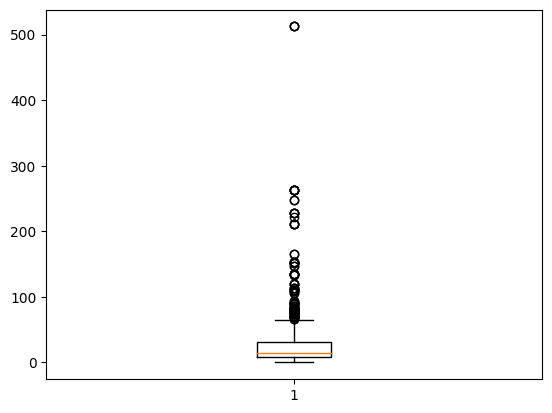

In [ ]:
plt.boxplot(train_1.Fare)

In [ ]:
#Можно убрать выбросы в цене, ибо цена свыше 2500 очень сильно будет влиять на подбор весов
#выбросы в колонке возраста не значитьльны их можно оставить
train_1 = train_1[train_1['Fare'] < 250]

In [ ]:
train_1[:5]

,Survived,Pclass,Sex,Age,SibSp,Fare,Q,S,2,3
PassengerId,,,,,,,,,,
1,0,3,1,22.0,1,7.2500,0,1,0,1
2,1,1,0,38.0,1,71.2833,0,0,0,0
3,1,3,0,26.0,0,7.9250,0,1,0,1
4,1,1,0,35.0,1,53.1000,0,1,0,0
5,0,3,1,35.0,0,8.0500,0,1,0,1


<Axes: title={'center': 'Fare'}, xlabel='Fare'>

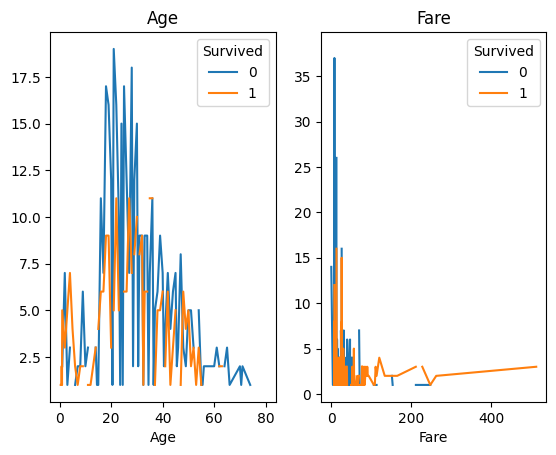

In [ ]:
create = pd.read_csv('train.csv')
fig, axes = plt.subplots(ncols=2)
create.pivot_table('PassengerId',['Age'], 'Survived', 'count').plot(ax=axes[0], title='Age')
create.pivot_table('PassengerId',['Fare'], 'Survived', 'count').plot(ax=axes[1], title='Fare')


Можно перевести возрост в две колонки: \
 0 if меньше 21года \
 1 if больше 21года или меньше 30 \
 всек то старше 30 лет будут иметь показатель (0,0) 

In [ ]:
res1 =[]
res2 =[]
for i in train_1.Age:
  if i < 21.0:
    res1.append(1)
  else:
    res1.append(0)
  if i >= 21.0 and i < 30.0:
    res2.append(1)
  else:
    res2.append(0)

train_1['age_1'] = res1
train_1['age_2'] = res2
train_1[:5]

,Survived,Pclass,Sex,Age,SibSp,Fare,Q,S,2,3,age_1,age_2
PassengerId,,,,,,,,,,,,
1,0,3,1,22.0,1,7.2500,0,1,0,1,0,1
2,1,1,0,38.0,1,71.2833,0,0,0,0,0,0
3,1,3,0,26.0,0,7.9250,0,1,0,1,0,1
4,1,1,0,35.0,1,53.1000,0,1,0,0,0,0
5,0,3,1,35.0,0,8.0500,0,1,0,1,0,0


In [ ]:
X = train_1.drop('Survived',axis=1)
y = train_1['Survived']
X_train, X_test, y_train, y_test = train_test_split(X, y, 
                                                    test_size=0.2,
                                                    random_state=42)

model = LogisticRegression()
model.fit(X_train, y_train)


/usr/local/lib/python3.10/dist-packages/sklearn/linear_model/_logistic.py:458: ConvergenceWarning: lbfgs failed to converge (status=1):
STOP: TOTAL NO. of ITERATIONS REACHED LIMIT.

Increase the number of iterations (max_iter) or scale the data as shown in:
    https://scikit-learn.org/stable/modules/preprocessing.html
Please also refer to the documentation for alternative solver options:
    https://scikit-learn.org/stable/modules/linear_model.html#logistic-regression
  n_iter_i = _check_optimize_result(


LogisticRegression()

In [ ]:
predictions1 = model.predict_proba(X_test)
fpr1, tpr1, thresh1 = roc_curve(y_test, predictions1[:,1])

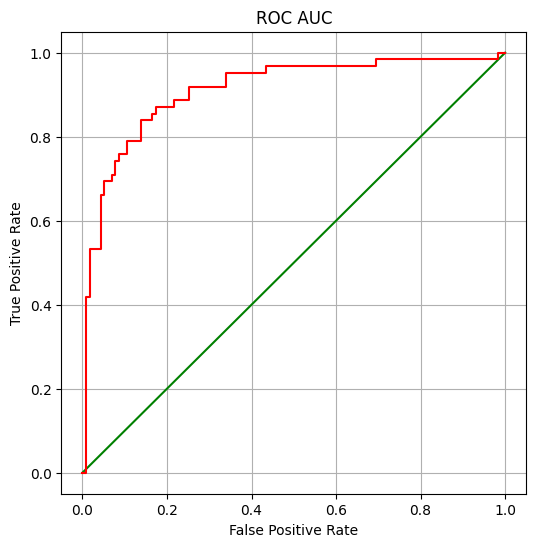

In [ ]:
plt.figure(figsize=(6,6))
a = [0,1]
b = [0,1]
plt.plot(a,b,color='g')
plt.plot(fpr1, tpr1,color='r')
plt.title('ROC AUC')
plt.xlabel('False Positive Rate')
plt.ylabel('True Positive Rate')
plt.grid()
plt.show()

In [ ]:
model.score(X_test,y_test)

0.8418079096045198

###**Сравним две метрики**

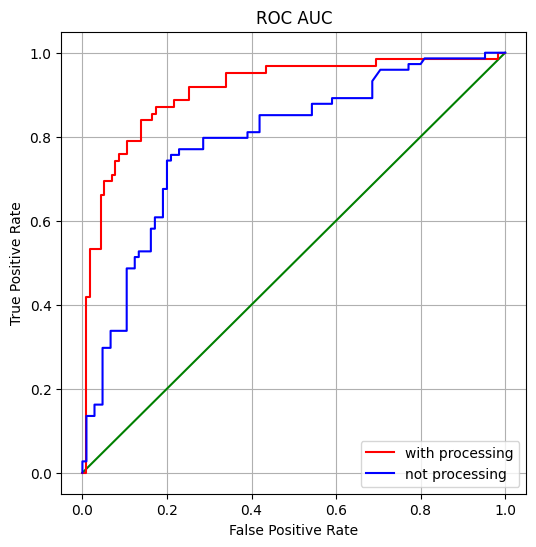

In [ ]:
plt.figure(figsize=(6,6))
a = [0,1]
b = [0,1]
plt.plot(a,b,color='g')
plt.plot(fpr1, tpr1,color='r',label='with processing')
plt.plot(fpr, tpr,color='b',label='not processing')
plt.legend()
plt.title('ROC AUC')
plt.xlabel('False Positive Rate')
plt.ylabel('True Positive Rate')
plt.grid()
plt.show()

11. Сформулируйте выводы по проделанной работе.
  1. Кратко опишите какие преобразования были сделаны и почему.
  2. Сравните метрики моделей из п. 2 и п. 10.
  3. Напишите свое мнение о целесообразности работы с данными при построении моделей машинного обучения. *Нужно ли аналогичным образов исследовать и дополнять действительно большие данные?



1. Мною была проделана небольшая работа по анализу данных и обучению модели на датасете ~`train.csv`~- *Tittanik* .Мною были очшенны данные, преобразованы в приемлемый, для обучения модели, вид
2. По графику выше видно что датасет с чистыми данными имеет лучшие показатель на метрики `ROC_AUC`
3. Обработку данных считаю целесообразным , оставляя пропуски и хаотичные данне мы усложняем работу модели и ей тяжело обучаться. Работая с большими данными целесообранее сделат срез данных и обучать модель на очищенных , подготовленных и релевантных данных

#**Результат:** применены на практике основные методы разведочного анализа данных (exploratory data analysis, EDA). Проведена оценка качества данных.